# Behaviour of Linear Models

## Imports 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Fixing the seed value to obtain same resutls throughout
np.random.seed(seed=42)

## Defining Reusable Functions

In [13]:
def draw_line(coef,intercept, mi, ma,ax):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    ax.plot(points[:,0], points[:,1], color='green')

## What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

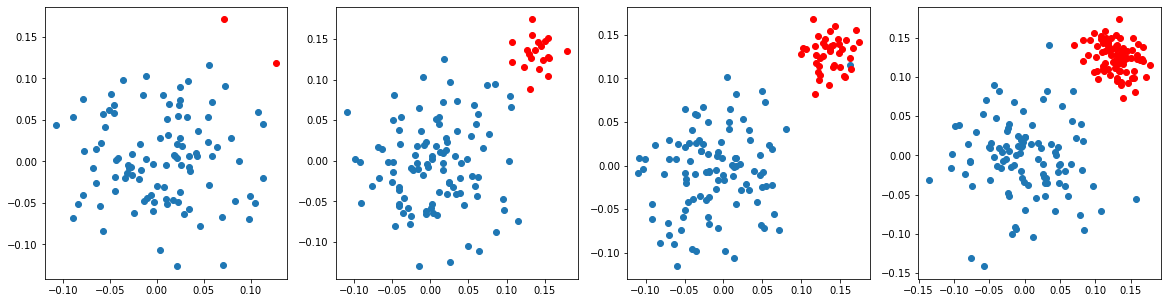

In [17]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <b> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </b> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

### Linear SVM Implementation

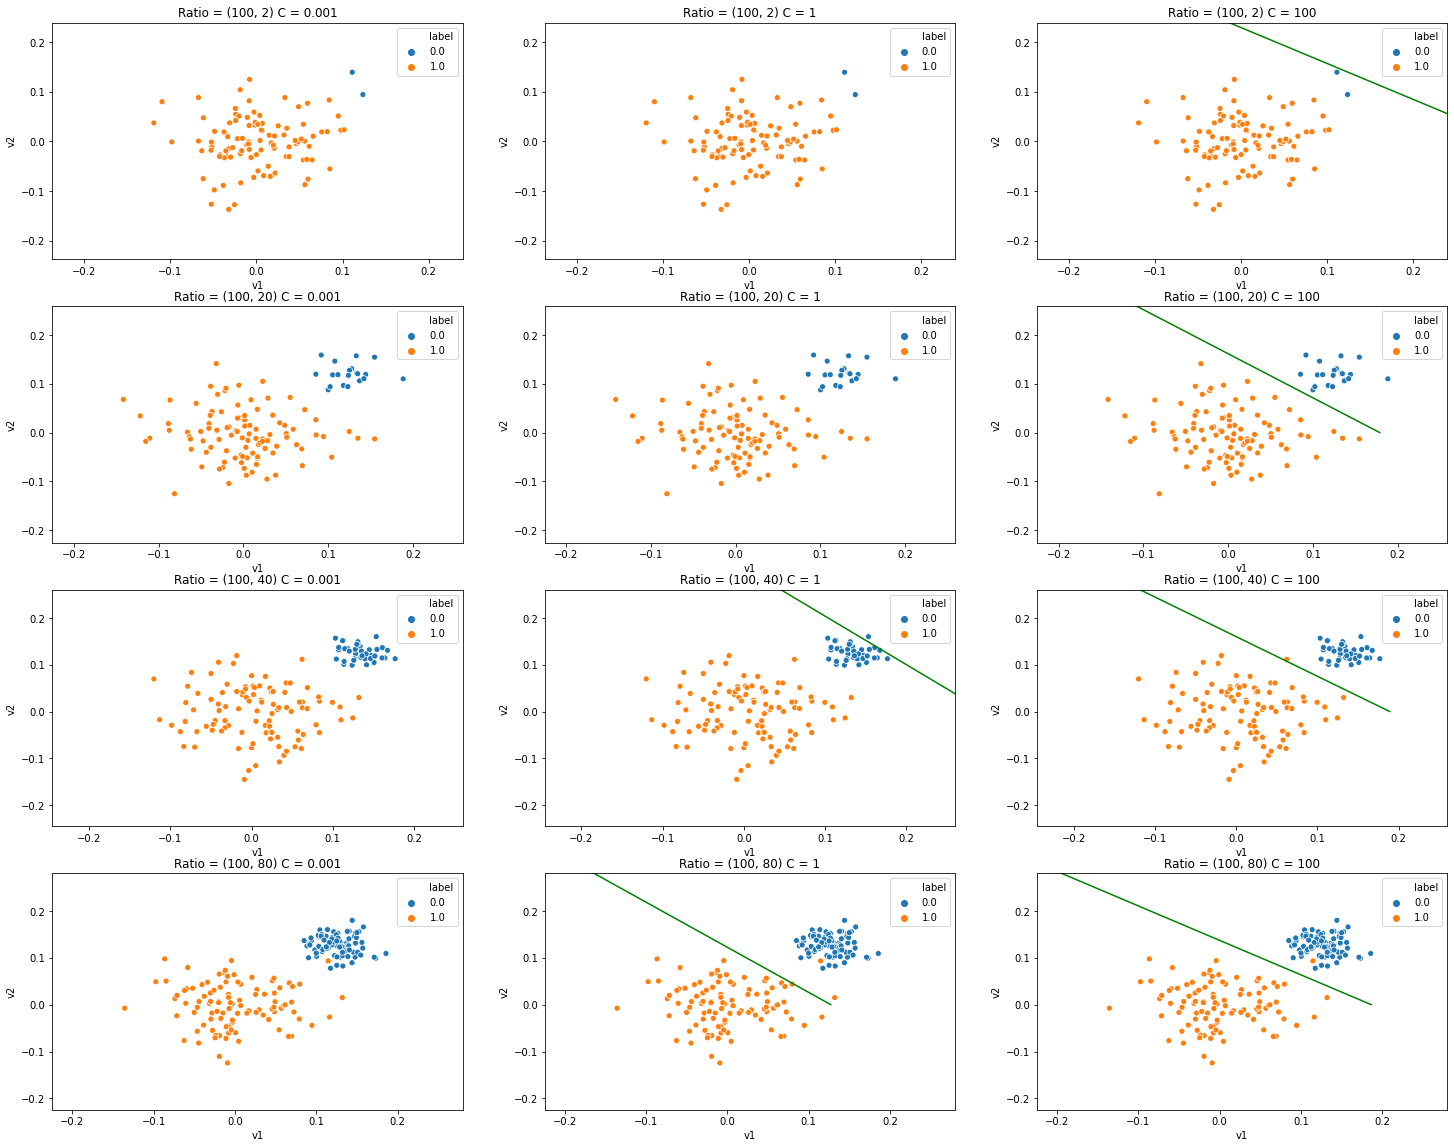

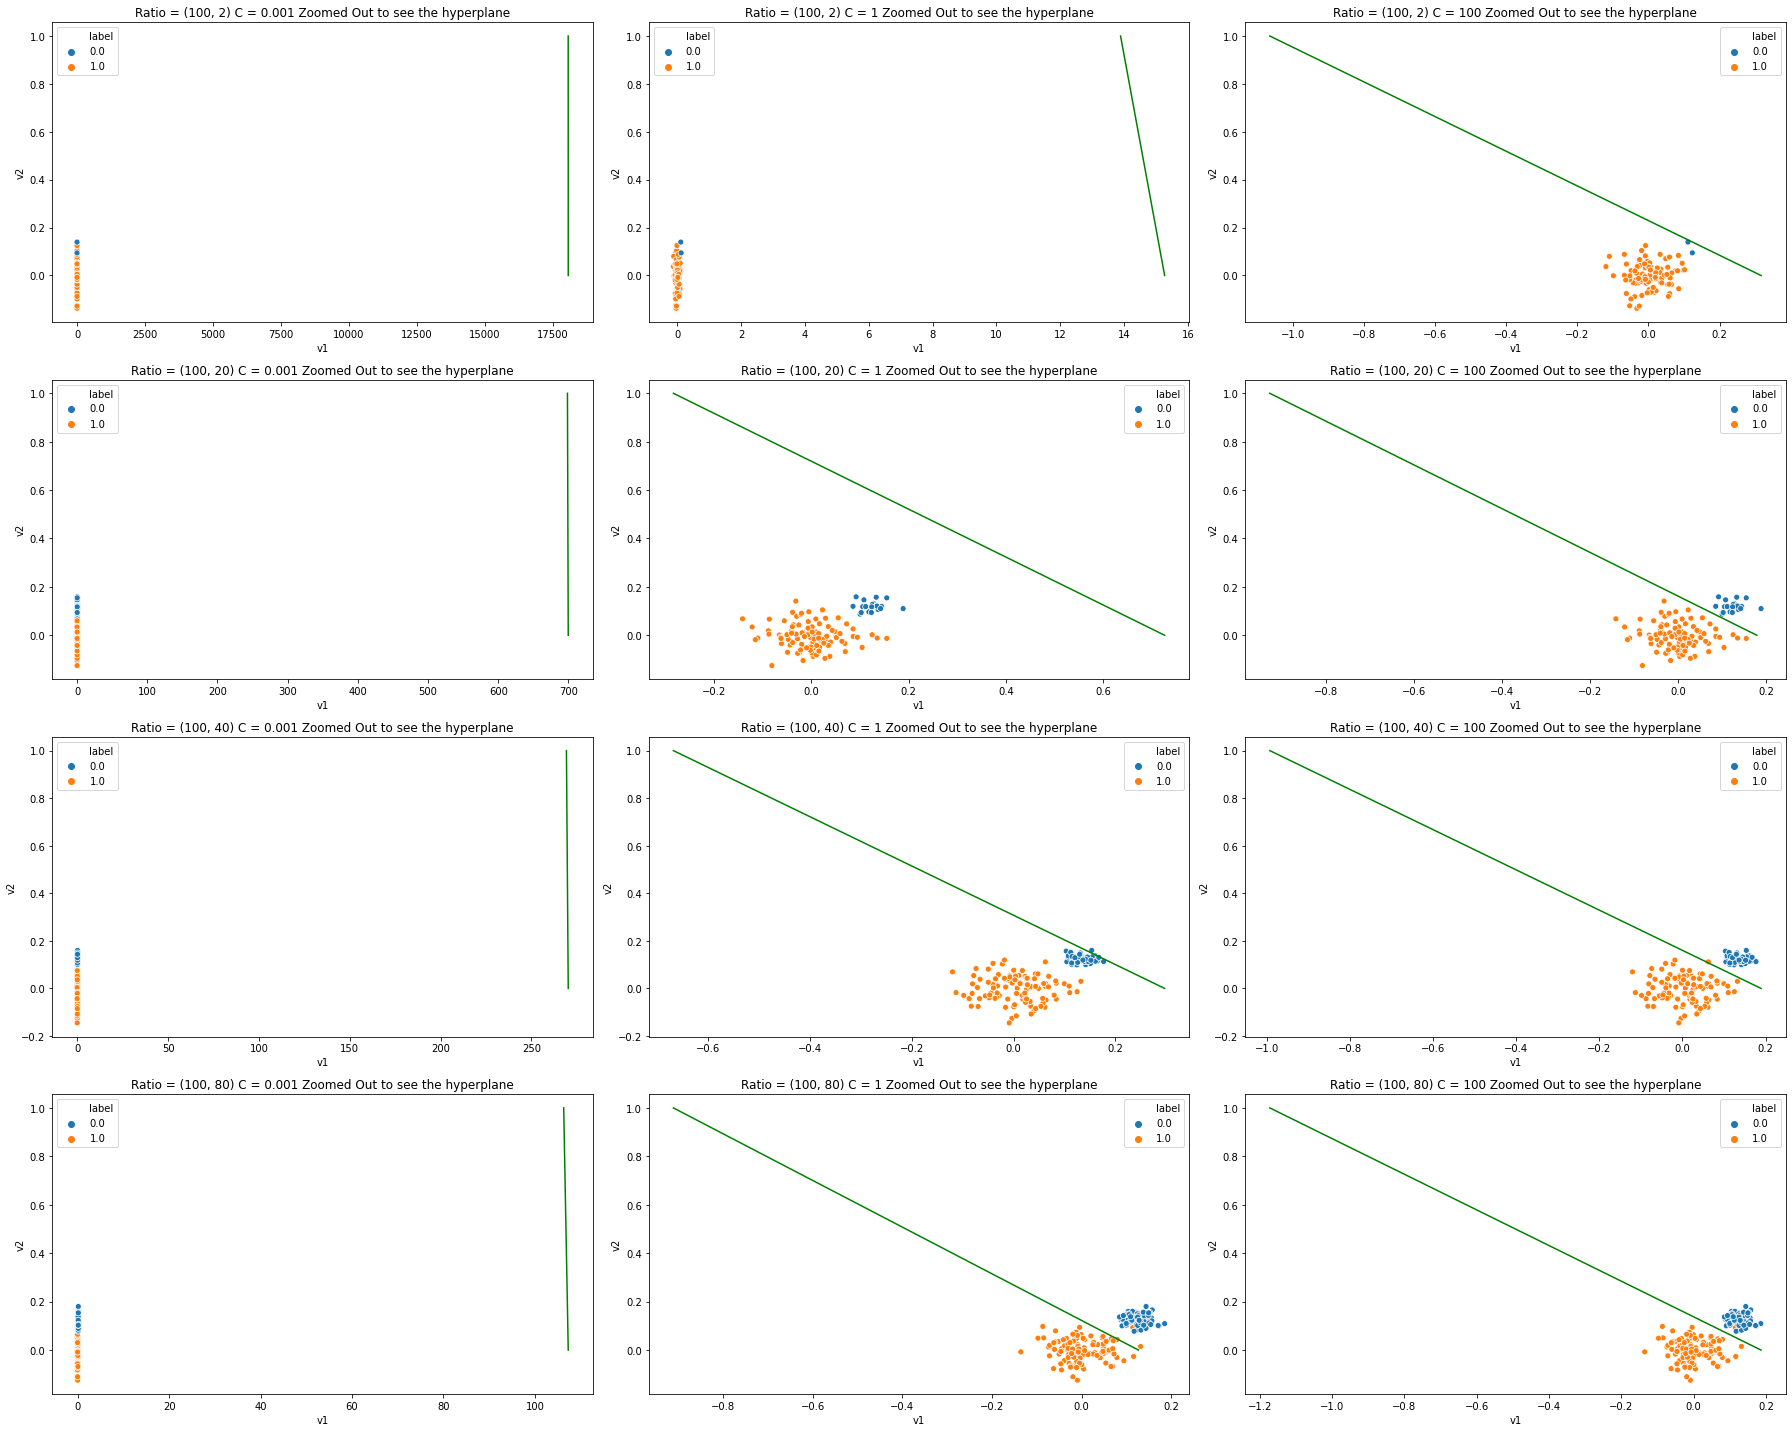

In [19]:
_, ax = plt.subplots(4,3, figsize=(25,20))
_, ax1 = plt.subplots(4,3, figsize=(25,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    x_train=np.vstack((X_p,X_n))
    y_train=np.vstack((y_p,y_n))
    
    # Creating dataframe for plptting purpose
    df = pd.DataFrame(np.hstack((x_train,y_train)),columns=['v1','v2','label'])
    
    # Hyperparameter Tuning
    for ind, param in enumerate([0.001, 1, 100]):
        # Training the model
        clf = SVC(C=param, kernel='linear',random_state=42)
        clf.fit(x_train, y_train)
        # Plotting the scatter plot
        sns.scatterplot('v1', 'v2', hue='label', data=df, ax=ax[j][ind])
        sns.scatterplot('v1', 'v2', hue='label', data=df, ax=ax1[j][ind])
        # Drawing the hyper plane.
        draw_line(clf.coef_[0], clf.intercept_[0], min(df['label']), max(df['label']), ax[j][ind])
        draw_line(clf.coef_[0], clf.intercept_[0], min(df['label']), max(df['label']), ax1[j][ind])
        # Limiting the plot so that values could be seen properly
        ax[j][ind].set_ylim(min(x_train[:,1])-0.1,max(x_train[:,1])+0.1)
        ax[j][ind].set_xlim(min(x_train[:,1])-0.1,max(x_train[:,1])+0.1)
        # Setting heading for each plot
        ax[j][ind].set_title('Ratio = {} C = {}'.format(i, param))
        # Setting x_label and y_label for each plot
        ax[j][ind].set_xlabel = df['v1'].values
        ax[j][ind].set_ylabel = df['v2'].values
        ax1[j][ind].set_title('Ratio = {} C = {} Zoomed Out to see the hyperplane'.format(i, param))
        # Setting x_label and y_label for each plot
        ax1[j][ind].set_xlabel = df['v1'].values
        ax1[j][ind].set_ylabel = df['v2'].values
        plt.tight_layout()

**Note**:
- Created zoomed in and zoomed out version of plots.

- If you traverse the grid horizontally the class ratio remains same and hyper parameter values change only.

- If you traverse the grid vertically the class ratio value changes and hyper parameter values remain same.

### Oberservations on Linear SVM Implementation Outcome

- **For ratio 100:2**
    
    Since the number of datapoints for class 0 is very less hence in the optimization problem there are lesser constraints regrading the data points of class 0.This leads to optimization problem give weights and biases which are optimized for class 1 data points 
    
    - **C=0.001**
        
        Reguralization Hyperparameter value is small => higher chance of underfitting as the cost/penalty of making mistakes is prettylow. Hence the (weights) normal vector to the hyperplane has such high values.      
        
    - **C = 1**
        
        Reguralization Hyperparameter value is pretty high. => lesser chance of underfitting as the cost/penalty of making mistakes is pretty high.
    
    - **C = 100**
        
        Reguralization Hyperparameter value is very high => Much higher cost/penalty of making mistakes.
    
        
- **Summary**
    
    - Due to so high data imabalance that the model is always underfitting as there are lesser constraints on the optimzation problem.
    - If such scenarios occur, then even for a small mistake the model should have high cost/penalty

- **For ratio 100:20**

    A bit better ratio of data is helping the model to put much better contraints on the optimization problem.
    
    - **C = 0.001**
        
        Here again the hyperplane is far from the actual datapoint meaning it is still classifying the data points of class 0 as 1 , this is due to factor that cost/penalty on optimization for making mistakes is way too low.           
    
    - **C = 1**
        
        Here still the hyperplane/model does not identifies the class 0 points but it is much closer to the data point clusters due to high regularization.
      
    - **C = 100**
        
        Due to very high cost/penalty/regualrization factor the model is pretty much correclty classfiying the data points.
        
- **Summary** 
    Due to high 100:20 imbalance is pretty high hence using very strict regularization on the optimization problem helps in correct classification of data points.
    
- **For ratio 100:40**
    A much better class ratios will need lesser penalty as there are greater number of constraints on the optimization problem.
    
    - **C=0.001**
        - Too low of penalty is not helping the model.
    - **C = 1**
        - With slight increase in regularization factor the model can fairly well distinguish betweem the different class with some errors.
      
    - **C = 100**
        - Due to very high penalty the model works very well.
- **Summary** 
    Due to high 100:40 imbalance is pretty less hence using moderate regularization on the optimization problem helps in correct classification of data points.
        
- **For ratio 100:80**
    
    - **C=0.001**
        - Too low of penalty is not helping the model.
    - **C = 1**
        - Here the model works perfectly well.
    - **C = 100**
        - Mot much change in the model and the model works perfectly well.
        
- **Summary** 
    Due to high 100:80 imbalance is very low hence using moderate regularization on the optimization problem helps in correct classification of data points.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

### Logistic Regression Implementation

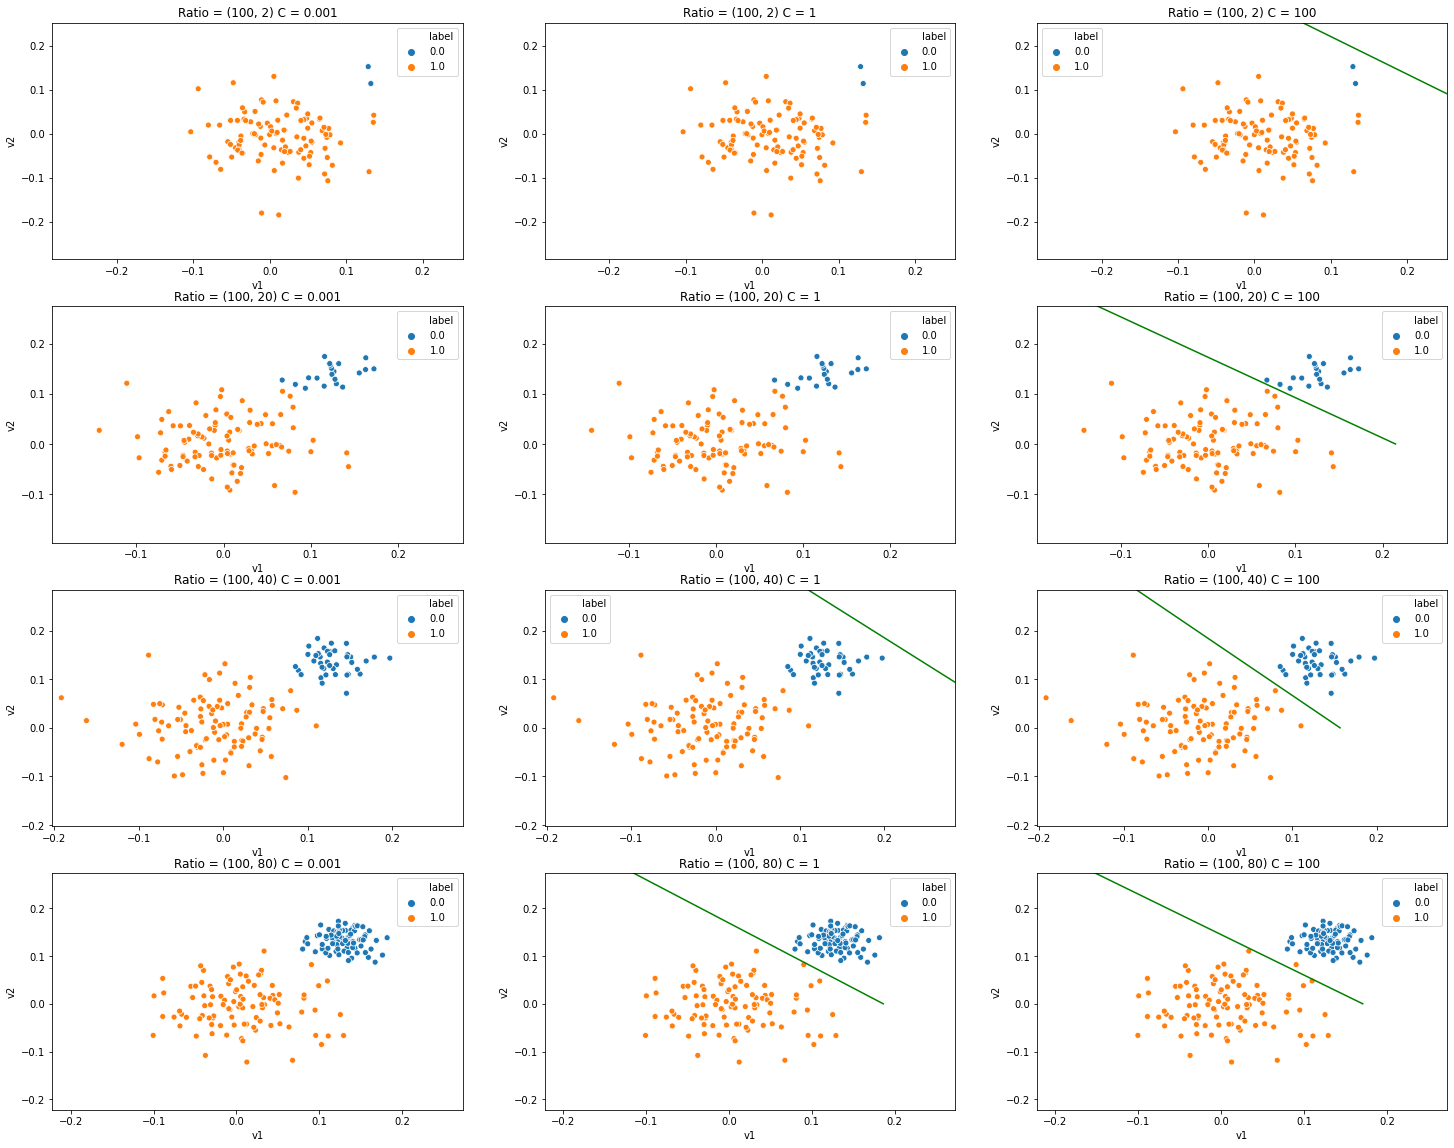

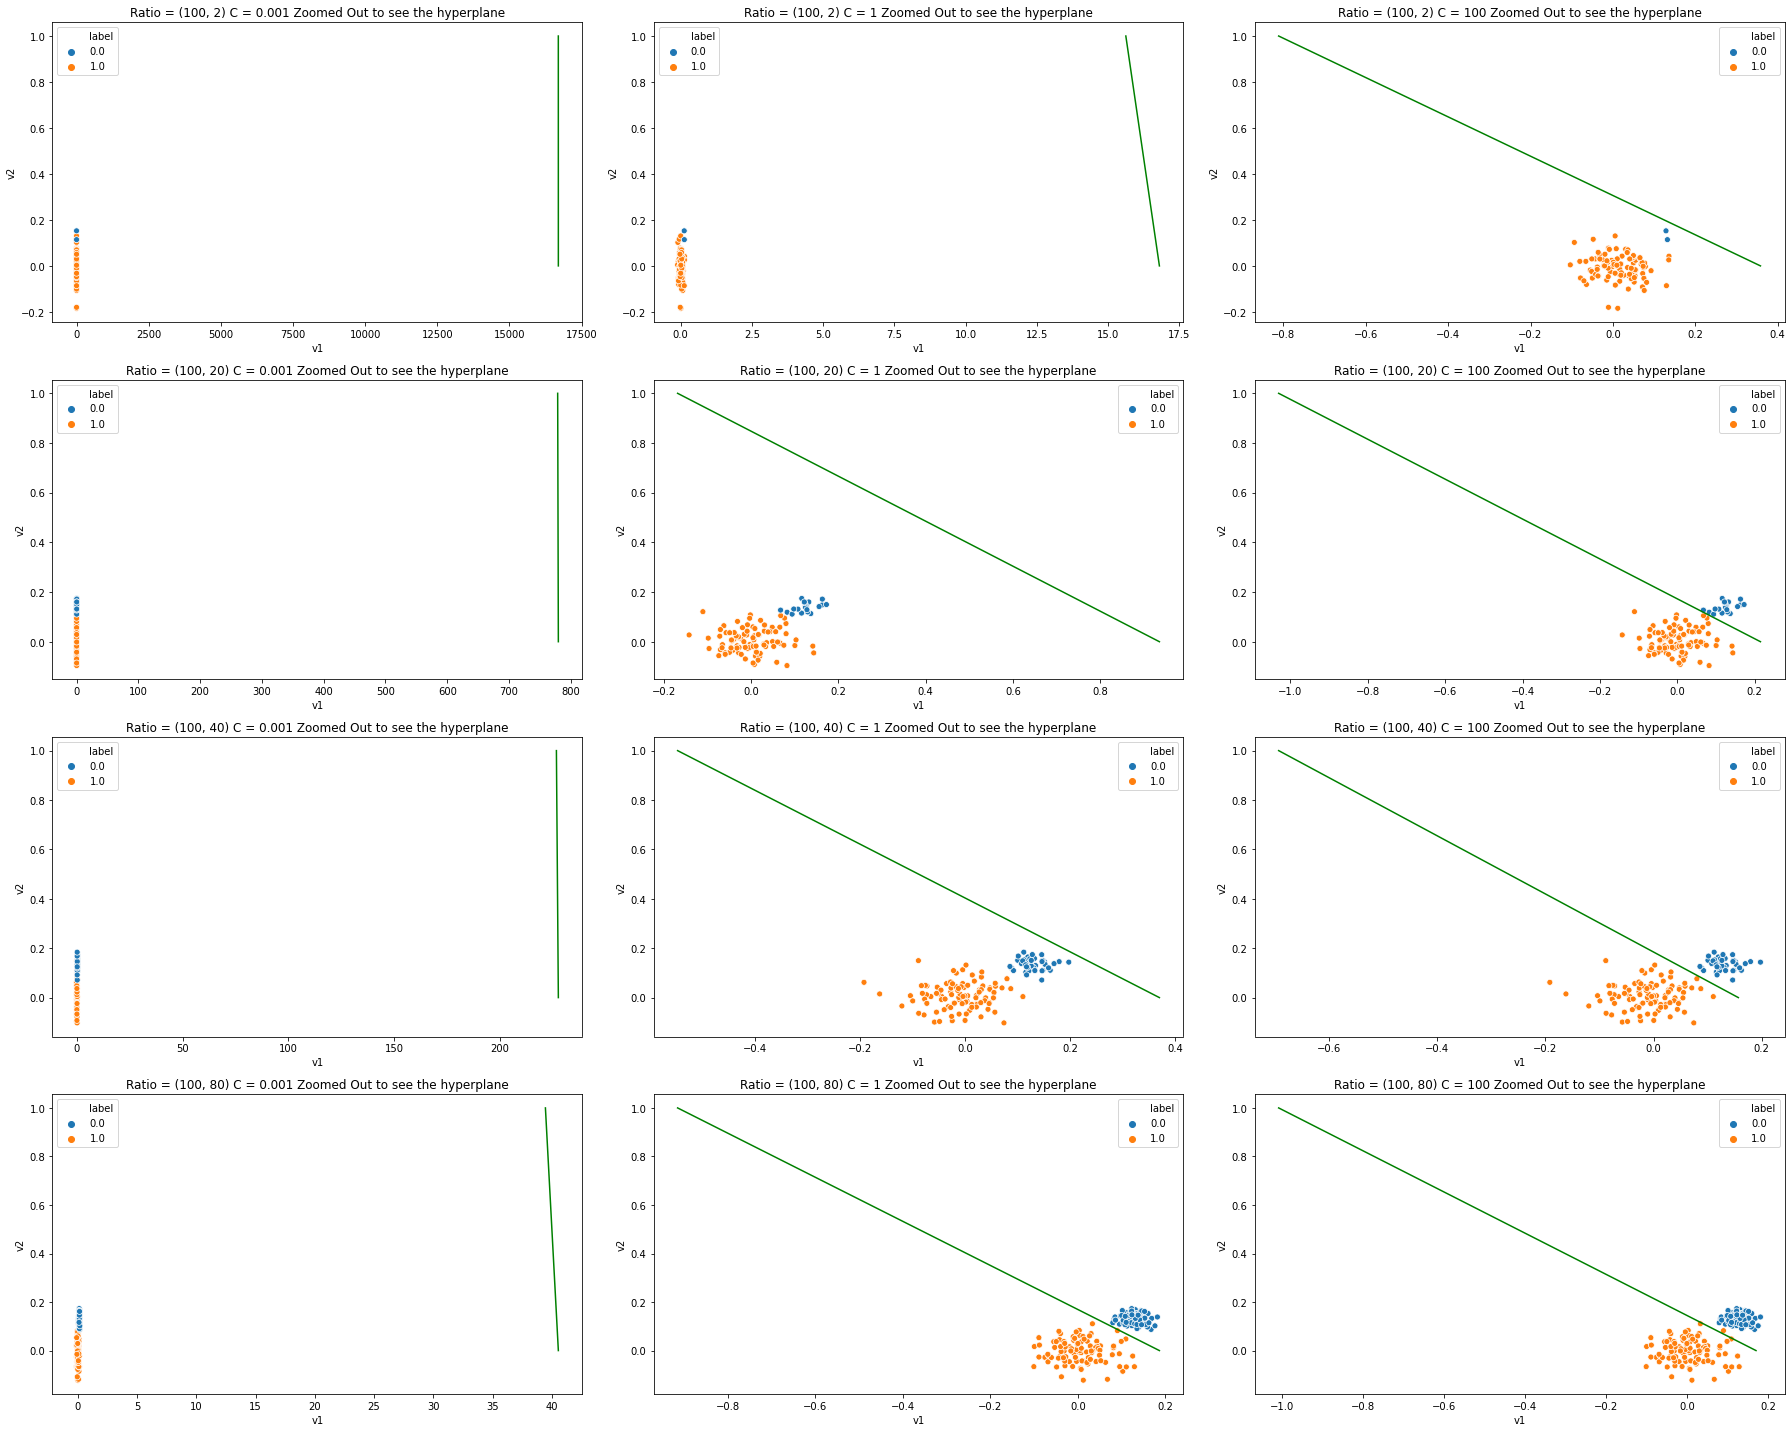

In [21]:
_, ax = plt.subplots(4,3, figsize=(25,20))
_, ax1 = plt.subplots(4,3, figsize=(25,20))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    x_train=np.vstack((X_p,X_n))
    y_train=np.vstack((y_p,y_n))
    
    # Creating dataframe for plptting purpose
    df = pd.DataFrame(np.hstack((x_train,y_train)),columns=['v1','v2','label'])
    
    # Hyperparameter Tuning
    for ind, param in enumerate([0.001, 1, 100]):
        # Training the model
        clf = LogisticRegression(C=param, random_state=42)
        clf.fit(x_train, y_train)
        # Plotting the scatter plot
        sns.scatterplot('v1', 'v2', hue='label', data=df, ax=ax[j][ind])
        sns.scatterplot('v1', 'v2', hue='label', data=df, ax=ax1[j][ind])
        # Drawing the hyper plane.
        draw_line(clf.coef_[0], clf.intercept_[0], min(df['label']), max(df['label']), ax[j][ind])
        draw_line(clf.coef_[0], clf.intercept_[0], min(df['label']), max(df['label']), ax1[j][ind])
        # Limiting the plot so that values could be seen properly
        ax[j][ind].set_ylim(min(x_train[:,1])-0.1,max(x_train[:,1])+0.1)
        ax[j][ind].set_xlim(min(x_train[:,1])-0.1,max(x_train[:,1])+0.1)
        # Setting heading for each plot
        ax[j][ind].set_title('Ratio = {} C = {}'.format(i, param))
        # Setting x_label and y_label for each plot
        ax[j][ind].set_xlabel = df['v1'].values
        ax[j][ind].set_ylabel = df['v2'].values
        ax1[j][ind].set_title('Ratio = {} C = {} Zoomed Out to see the hyperplane'.format(i, param))
        # Setting x_label and y_label for each plot
        ax1[j][ind].set_xlabel = df['v1'].values
        ax1[j][ind].set_ylabel = df['v2'].values
        plt.tight_layout()

**Note**:
- Created zoomed in and zoomed out version of plots.

- If you traverse the grid horizontally the class ratio remains same and hyper parameter values change only.

- If you traverse the grid vertically the class ratio value changes and hyper parameter values remain same.

### Observation on Logistic Regression Outcome

- **For ratio 100:2**
    
    The current imabalance is too low  
    
    - **C = 0.001**
    
        Since the model has very low penalty on weight vectors hence the model will have small absoulte derivative values which would in turn lead to high absoulte weight values and hence the hyperplane would do missclassification as minority datapoints are pretty less
        
    - **C = 1**
    
        Since the model has moderate penalty on weight vectors hence the model will have weight vectors a bit less towards the dominant classes and would also try to classify the minority classes . Even though it fails to do so but we can see that it has bent towards the datapoints.
       
    - **C = 100**
        
        Since the model has very high penalty on weight vectors hence the model will have weight vectors which .wil lincur heavy penalties and due to which the dervative absolute value will become higher and the hyperplane will tend towards the miinority classes also. Here we see that hyperplane **almost touches the minority class datapoints** , but , due to very high iabalance in data it is not able to do so
       

- **For ratio 100:20**

    The current imbalance is low.
    But since the class imabalance is much less than previous case notice the **x axis** values , here the hyperplane is **much closer** to the datapoints than in the previous case with same hyperparameters.
    
    - **C = 0.001**
    
        Since the model has very low penalty on weight vectors hence the model will have weight vectors of very high absolute value in the favour of dominant classes.
        
    - **C = 1**
    
        Higher penalty due to high hyperparameter value hence the model is **almost close** to the data points.
        
    - **C = 100**
    
       Since Very high penalty the model here classifies the different **classes correctly**.

- **For ratio 100:40**

    The current imbalance okay.
    But since the class imabalance is much less than previous case notice the **x axis** values , here the hyperplane is **much more closer** to the datapoints than in the previous case with same hyperparameters.
    
    - **C = 0.001**
    
        Since the model has very low penalty on weight vectors hence the model will have weight vectors of moderatly high absolute value in the favour of dominant classes.
        
    - **C = 1**
    
        Higher penalty due to high hyperparameter value hence the model is **very close** to the data points.
        
    - **C = 100**
    
       Since Very high penalty the model here classifies the different classes **almost correctly**.

- **For ratio 100:80**
    
    The current imbalance good.
    But since the class imabalance is much less than previous case notice the **x axis** values , here the hyperplane is **much more closer** to the datapoints than in the previous case with same hyperparameters.
    
    - **C = 0.001**
    
        Since the model has very low penalty on weight vectors hence the model will have weight vectors of okay absolute value in the favour of dominant classes.
        
    - **C = 1**
    
        The hyperplane can **easily seperate** the classes.
        
    - **C = 100**
    
       Since Very high penalty the model here classifies the different classes but makes a mistake of classifiying dominant class as minor class.

    